# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

QUESTION 1

In [585]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [586]:
! git clone https://github.com/ds4e/wrangling

fatal: destination path 'wrangling' already exists and is not an empty directory.


In [587]:
df = pd.read_csv("./wrangling/assignment/data/airbnb_hw.csv") # accessing the data

In [588]:
df.head() # viewing the data

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [589]:
df['Price'].isnull().sum() # checking for missing values ( no missing values)

0

In [590]:
df["Price"].head()

,Price
0,145
1,37
2,28
3,199
4,549


In [591]:
df["Price"].unique() # I noticed that number beyond 999 have a comman in them ( we should remove them to ensure consistency) ( We use this to see which different types of data we have (checking for inconsistencies))

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [592]:
df["Price"] = df['Price'].str.replace(',', '').astype(int) # removing the commas, and changing data type because we don't want string as numbers

In [593]:
df = df.dropna(subset=["Price"]) #removing missing values (just in case)

In [594]:
df["Price"].unique() # checking if the commas are gone and the data type has changed

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

QUESTION 1 (PART 2)

In [595]:
df1 = pd.read_csv("./wrangling/assignment/data/mn_police_use_of_force.csv")

In [596]:
df1.head() # viewing the data

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [597]:
print(df1["subject_injury"].unique()) # we can see if there's any inconsistencies ( nan and looks like No and Yes are both strings)

[nan 'No' 'Yes']


In [598]:
missing_data=df1["subject_injury"].isnull().sum() # checking for missing values ( no missing values)
length= len(df1["subject_injury"])# checking the length of this column
print(missing_data/length) # proportion of missing

0.7619342359767892


Having over 75% of the data in subject_injury column is very concering (only 25% of data from that column, it's not sufficient to corroborate with other data)

In [599]:
df11 = df1["subject_injury"].fillna("Missing") # filling the missing values as "Missing" ( so it can be eaiser for cross checking)

In [600]:
crosstab = pd.crosstab(df11, df1["force_type"], margins=True)
print(crosstab) # cross checking the information with force_type (if there's alot of missing values being shown in a certain force type/with injury ( then this may indicate bias))

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
Missing             2          7051               1421        0   
No                  0          1093                131        2   
Yes                 2          1286                 41        0   
All                 4          9430               1593        2   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
Missing                        27                 74           87   
No                             33                 34            0   
Yes                            44                 40            0   
All                           104                148           87   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
Missing                              0  

*It looks like Bodily Force (7051) had the most missing values- indicating possible bias in data collection, or Inconsistent injury reporting. There shouldn't be that much missing values for this. This could be concerning because it gives this notion of unusaul omission for this force type- potential bias/inconsistency. Some unique pattern I noticed is that Bodily Force and Chemical Irritant ( both being high missing value categories) have way more missing values than injury reported ( indicating bias/inconsistency). Also, for Tasers and Police K9 Bites ( there are very few missing data, which may indicate that there's less inconsistency/bias ( as being more serious injury).  

In [601]:
df1 = df1.dropna(subset=["subject_injury"])# removing missing values

In [602]:
df1["subject_injury"]= df1["subject_injury"].astype(str).str.strip().str.lower() # this deletes any spaces, makes all values lower case, and converts all data values into a string.
df1["subject_injury"] = df1["subject_injury"].replace("yes", "Yes") # replces yes with uppercase yes
df1["subject_injury"] = df1["subject_injury"].replace("no", "No") # replaces no with uppercase no

<ipython-input-602-873f2b2e48c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["subject_injury"]= df1["subject_injury"].astype(str).str.strip().str.lower() # this deletes any spaces, makes all values lower case, and converts all data values into a string.
<ipython-input-602-873f2b2e48c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["subject_injury"] = df1["subject_injury"].replace("yes", "Yes") # replces yes with uppercase yes
<ipython-input-602-873f2b2e48c7>:3: SettingWithCopyWarning: 
A val

In [603]:
df1.head()# viewing if data is cleaned

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
9,2016/01/01 02:38:23,Fight,No,DISCON,No,Chemical Irritant,Crowd Control Mace,Black,Male,18.0,commission of crime,1,Downtown West
10,2016/01/01 02:38:23,Fight,No,DISCON,No,Chemical Irritant,Chemical Munitions,Black,Male,18.0,commission of crime,1,Downtown West
11,2016/01/01 02:39:47,Suspicious Person,No,DISCON,Yes,Bodily Force,Body Weight to Pin,Black,Male,21.0,Tensed,5,Lowry Hill East
12,2016/01/01 02:39:47,Suspicious Person,No,DISCON,Yes,Bodily Force,Joint Lock,Black,Male,21.0,Tensed,5,Lowry Hill East
13,2016/01/01 02:39:47,Suspicious Person,No,DISCON,Yes,Bodily Force,Body Weight to Pin,Black,Male,21.0,Tensed,5,Lowry Hill East


QUESTION 1 (PART 3)

In [604]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df2 = pd.read_csv(url,low_memory=False)

In [605]:
df2.head() # viewing the data

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [606]:
print(df2.columns) # viewing the columns

Index(['InternalStudyID', 'REQ_REC#', 'Defendant_Sex', 'Defendant_Race',
       'Defendant_BirthYear', 'Defendant_Age', 'Defendant_AgeGroup',
       'Defendant_AgeatCurrentArrest', 'Defendant_AttorneyTypeAtCaseClosure',
       'Defendant_IndigencyStatus',
       ...
       'NewFelonySexualAssaultArrest_OffDate',
       'NewFelonySexualAssaultArrest_ArrestDate',
       'NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate',
       'NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate',
       'NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate',
       'NewFelonySexualAssaultArrest_Disposition',
       'Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis',
       'CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual',
       'DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound',
       'CrimeCommission2021ReportClassificationofDefendants'],
      dtype='object', length=709)


In [607]:
df2= df2.rename(columns={'WhetherDefendantWasReleasedPretrial': 'released','ImposedSentenceAllChargeInContactEvent':'imp', 'SentenceTypeAllChargesAtConvictionInContactEvent':'sen'}) #renaming column header

In [608]:
df2['released'].unique() # checking the unique values

array([9, 0, 1])

In [609]:
df2['released'].isnull().sum() # checking for missing values( no missing values)

0

In [610]:
df2['released']= df2['released'].replace(9,np.nan) # replacing 9 with nan ( because we had a 9 and 0/1 ( which indicate binary yes or no values))

In [611]:
df2['released'].unique() # checking if 9 is gone

array([nan,  0.,  1.])

In [612]:
df_dummies= pd.get_dummies(df2['released'].astype('Int64') ,dummy_na=False) # converting into dummy variables ( INT), and getting rid of the NAN column ( from the np.nan method)

In [613]:
df_dummies.head() # checking the dummies

,0,1
0,False,False
1,True,False
2,True,False
3,True,False
4,False,True


QUESTION 1 PART 4

In [614]:
#This part shows us that some missing values might not be random ( related/explained by another column)
# for example, with this variable: SentenceTypeAllChargesAtConvictionInContactEvent, if a defendeant was not convicted, or had dropped charges ( then no sentence would be given)
df2['sen'].isna().sum() # invesitgating if there's any missing values (none)

0

In [615]:
df2['sen'].unique() # checking the unique values

array([9, 0, 1, 4, 2])

In [616]:
df2['sen'].head(20)

,sen
0,9
1,0
2,1
3,1
4,4
5,0
6,1
7,0
8,1
9,1


In [617]:
df2['imp'].unique() # checking the unique values

array([' ', '60', '12', '.985626283367556', '36', '6', '24',
       '5.91375770020534', '120', '72', '11.9917864476386', '0',
       '2.95687885010267', '84', '108', '300', '240', '180', '4', '96',
       '2', '54', '.328542094455852', '44', '5', '115', '132', '48',
       '258', '34', '76', '.164271047227926', '.131416837782341', '111',
       '9', '3', '1.97125256673511', '36.9856262833676',
       '.0657084188911704', '35.4928131416838', '106.492813141684', '8',
       '35', '18.3141683778234', '480', '32', '93', '234', '732',
       '1.16427104722793', '4.6570841889117', '21', '7',
       '4.49281314168378', '18', '600', '43.1642710472279', '179', '52',
       '30', '20', '192', '702', '14', '55', '53', '11.9055441478439',
       '114', '35.0061601642711', '68', '.657084188911704',
       '46.6242299794661', '102', '65', '200', '57', '24.3285420944559',
       '12.1642710472279', '117', '81.4928131416838', '22.4928131416838',
       '1980', '3.6570841889117', '56', '10', '2.7926078

In [618]:
df2['imp'].isnull().sum() # checking for missing values ( no missing values)

0

In [619]:
df2['imp'].replace(" ", np.nan, inplace=True) # replaceing the spaces with nan


<ipython-input-619-8005e609c5a0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['imp'].replace(" ", np.nan, inplace=True) # replaceing the spaces with nan


In [620]:
df2['imp']= pd.to_numeric(df2['imp'], errors='coerce') # changing the data type to numeric

In [621]:
df2['imp'].unique() # checking final
np.set_printoptions(suppress=True) # making the numeric seem shorter
df2['imp']= df2['imp'].astype(float) # changing data type to int
df2['imp'].head(10)

,imp
0,NaN
1,60.000000
2,12.000000
3,0.985626
4,NaN
5,12.000000
6,36.000000
7,6.000000
8,24.000000
9,12.000000


In [622]:
miss1=df2['imp'].isna()
print(miss1) # checking which stuff have missing

0         True
1        False
2        False
3        False
4         True
         ...  
22981     True
22982     True
22983     True
22984     True
22985     True
Name: imp, Length: 22986, dtype: bool


In [623]:
miss2=df2['sen'].isna()
print(miss2)

0        False
1        False
2        False
3        False
4        False
         ...  
22981    False
22982    False
22983    False
22984    False
22985    False
Name: sen, Length: 22986, dtype: bool


In [624]:
miss1.value_counts() # checking the number of missing values

,count
imp,
False,13933
True,9053


Looks like we have over 9,000 missing values

In [625]:
pd.crosstab(miss1, miss2, margins=True) # checking the cross tab

sen,False,All
imp,,
False,13933,13933
True,9053,9053
All,22986,22986


We suspect that missing values in imp depend on sen

In [626]:
total_c= df2['sen'].value_counts()
total_c

,count
sen,
4,8779
0,8720
1,4299
2,914
9,274


In [627]:
missing_analysis = df2.groupby("sen")["imp"].apply(lambda x: x.isna().sum()) # this code groups the rows by unique values and split into 5 groups, code counts how many missing values are in the imp column - for each subgroup in the sen column

In [628]:
missing_percentage = (missing_analysis / total_c) * 100 # dividing whats missing and the total
missing_percentage

,0
sen,
0,0.0
1,0.0
2,0.0
4,100.0
9,100.0


This is important because it tells that 100 percent of the data  in (4 and 9) have missing values ( which tells us that they have no imposed sentence record ( maybe because of dismissal, acquittal. If 100% of them are missing, then that means they were meant not to be sentenced so they must be non-sentences

In [629]:
df2.loc[df2['sen'].isin([4,9])&df2['imp'].isna(), 'imp']="No sentence" # checking if

<ipython-input-629-4c0675284138>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No sentence' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[df2['sen'].isin([4,9])&df2['imp'].isna(), 'imp']="No sentence" # checking if


In [630]:
print(df2.loc[df2['sen'].isin([4, 9]), ['sen', 'imp']]) # checking if the sentence in category 9 ro 4 has an imp of no sentence


       sen          imp
0        9  No sentence
4        4  No sentence
11       4  No sentence
12       4  No sentence
15       4  No sentence
...    ...          ...
22981    4  No sentence
22982    9  No sentence
22983    4  No sentence
22984    4  No sentence
22985    4  No sentence

[9053 rows x 2 columns]


In [631]:
print(df2['imp'].isna().sum()) # checking if there's any missing values

0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [632]:
pip install xlrd # installing necessary packages

In [633]:
df3= pd.read_excel("GSAF5.xls")# reading excel file

In [634]:
df3.head() # viewing data

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


QUESTION 2 PART 2

In [635]:
df3 = df3.dropna(axis=1, how='all') # dropping columns with no data

QUESTION 2 PART 3

We would need to inspect the Year column

In [636]:
df3['Year'].unique() # checking the unique values

array([2025., 2024., 2026., 2023., 2022., 2021., 2020., 2019., 2018.,
       2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901.,

In [637]:
df3['Year'].isnull().sum() # checking for missing values ( 2 missing values)

2

In [638]:
df3['Year']= pd.to_numeric(df3['Year'], errors='coerce') # changing the data type to numeric

In [639]:
df3 = df3.dropna(subset=['Year']) # dropping the missing values

In [640]:
df3['Year'].unique() # checking if the missing values are gone

array([2025., 2024., 2026., 2023., 2022., 2021., 2020., 2019., 2018.,
       2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010., 2009.,
       2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000.,
       1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993., 1992.,
       1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965., 1964.,
       1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956., 1955.,
       1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848., 1947.,
       1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921., 1920.,
       1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912., 1911.,
       1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903., 1902.,
       1901., 1900.,

In [641]:
df3= df3[df3['Year']>=1940] # filtering the rows to focus on attacks since 1940

In [642]:
df3['Year'].unique() # checking if the years after 1940s

array([2025., 2024., 2026., 2023., 2022., 2021., 2020., 2019., 2018.,
       2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010., 2009.,
       2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000.,
       1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993., 1992.,
       1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965., 1964.,
       1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956., 1955.,
       1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947., 1946.,
       1945., 1944., 1943., 1942., 1941., 1940.])

It looks like we have 2026/2025 (which havent got enough data)

In [643]:
df3= df3[df3['Year']<=2024]

In [644]:
df3['Year'].describe() # checking the range of values

,Year
count,5451.000000
mean,1991.894515
std,24.069732
min,1940.000000
25%,1969.000000
50%,2000.000000
75%,2013.000000
max,2024.000000


<Axes: xlabel='Year'>

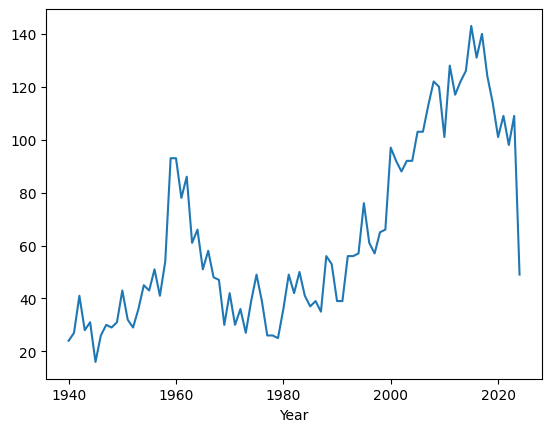

In [645]:
att= df3.groupby('Year').size() # checking the number of attacks per year
att.plot(kind='line') # ploting a line plot

It looks like the attacks have been generally decreasing since 2016, but a general increase from 1940-2015

QUESTION 2 PART 4

In [646]:
df3['Age'].head() # looking at the data

,Age
5,69
6,48
7,40
8,60+
9,?


In [647]:
df3['Age'].unique() # checking the unique values

array([69, 48, 40, '60+', '?', 57, 24, 45, 61, 27, 38, 16, 33, 30, 15, 23,
       41, 14, 26, 'Middle age', 21, 49, 25, 46, 19, 20, 65, 64, '13',
       nan, '11', '46', '32', '29', '10', '64', '62', '39', '22', '15',
       '16', '21', '66', '52', '20', '44', '26', '47', '55', '30', '59',
       '8', '50', '45', '34', '38', '30s', '37', '9', '19', '20/30', '35',
       '65', '20s', '77', '60', '49', '42', '!2', '24', '73', '25', '18',
       '50s', '58', '67', '17', '14', '6', '41', '53', '68', '43', '40',
       '51', '31', 39, 58, 51, 17, 10, 13, 60, 28, '40s', 68, 35, 62,
       'teen', 8, 22, 32, 56, 'Teen', 12, 42, 36, 18, 37, 50, 'M', 9, 11,
       34, '!6', 31, '!!', 47, 55, 7, 71, 59, 53, 54, 75, '45 and 15', 73,
       52, 29, 70, 4, 63, 44, '28 & 22', '22, 57, 31', '60s', "20's", 43,
       67, 74, '9 & 60', 'a minor', 6, 3, 82, 66, 72, '23', '12', '36',
       '63', '71', '48', '70', '18 months', '57', '7', '28', '33', '61',
       '74', '27', '3', '56', '28 & 26', '5', '54

In [648]:
df3['Age'] = pd.to_numeric(df3['Age'], errors='coerce')

In [649]:
# We need to use a function to clean things in order
def clean(age):
  if isinstance(age, str):
    if age.isdigit():
      return float(age)
    if "teen" in age: # this groups up the teen result into the age 15
      return 15
    elif "middle age" in age or "40s" in age or "50s" in age: # this groups up middle age values as 40
      return 40
    elif "elderly" in age or "60s" in age or "70s" in age: # this groups old/big age numbers as 60
      return 60
    elif "young" in age or "20s" in age or "30s" in age or "adult" in age: # this groups adults as 25
      return 25
    elif age in ['?','!', 'x', 'f','unknown','a minor']: # this put weird values as NAN ( we can drop those later)
      return None
  return age

  df3['Age']= af3['Age'].appply(clean) # apply this function to the 'Age column)


In [650]:
df3= df3.dropna(subset=['Age']) # dropping the missing values

In [651]:
df3['Age'].unique()# checking if data was cleaned

array([69., 48., 40., 57., 24., 45., 61., 27., 38., 16., 33., 30., 15.,
       23., 41., 14., 26., 21., 49., 25., 46., 19., 20., 65., 64., 13.,
       11., 32., 29., 10., 62., 39., 22., 66., 52., 44., 47., 55., 59.,
        8., 50., 34., 37.,  9., 35., 77., 60., 42., 73., 18., 58., 67.,
       17.,  6., 53., 68., 43., 51., 31., 28., 56., 12., 36.,  7., 71.,
       54., 75., 70.,  4., 63., 74.,  3., 82., 72.,  5., 86., 84., 87.,
        1., 81., 78.])

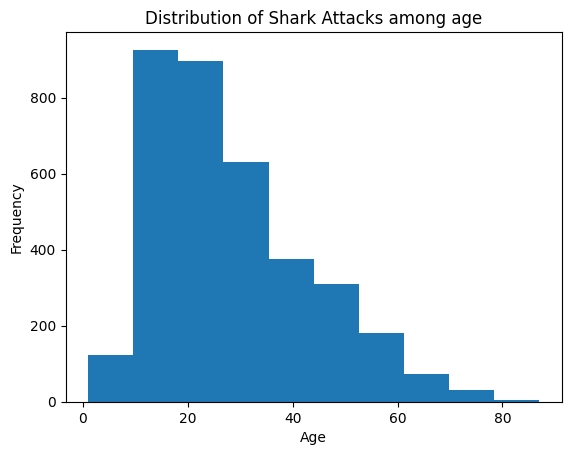

In [652]:
df3['Age'].hist(bins=10) # making a histogram
plt.title("Distribution of Shark Attacks among age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

QUESTION 2 PART 5

In [653]:
mp= (df3['Sex']== 'M').sum() / len(df3['Sex'])*100 # checking the proportion of males
mp

83.72747747747748

Looks like over 83% of people were male

QUESTION 2 PART 6

In [654]:
df3['Type'].unique() # checking the unique values

array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Sea Disaster', '?', nan, 'Invalid', 'Under investigation'],
      dtype=object)

We only want Unprovoked, provoked, and other ( we can delete this later because we only want provoked or unprovoked)

In [655]:
# Lets create another function
def clean1(type):
  if type == 'Provoked':
    return 'Provoked'
  elif type == 'Unprovoked':
    return 'Unprovoked'
  else:
    return 'Other'

df3['Type']= df3['Type'].apply(clean1) # applying the function

In [656]:
df3['Type'].unique() # checking if the function worked

array(['Unprovoked', 'Provoked', 'Other'], dtype=object)

In [657]:
df3['Type'].value_counts(normalize=True) # checking the proportion

,proportion
Type,
Unprovoked,0.831081
Other,0.087275
Provoked,0.081644


Looks like 83% of the attaks were unprovoked

QUESTION 2 PART 7

In [658]:
df3['Fatal Y/N'].unique() # checking the unique values

array(['N', 'Y', 'F', nan, 'M', 2017, 'UNKNOWN', ' N'], dtype=object)

In [659]:
df3['Fatal Y/N'].isnull().sum() # checking for missing values ( 201 missing values)

201

In [660]:
def clean3(fatal):
  if fatal == 'N':
    return 'N'
  elif fatal == 'Y':
    return 'Y'
  else:
    return 'Unknown'

In [661]:
menu=df3[(df3['Type']== 'Unprovoked') & (df3['Sex']== 'M')].shape[0]
print(menu)
menw=df3[(df3['Type']== 'Unprovoked') & (df3['Sex']== 'F')].shape[0]
print(menw)

2453
474


It looks like unporovked attacks are more likely to launch men

In [662]:
fetalunpm= df3[(df3['Type']== 'Unprovoked') & (df3['Fatal Y/N']== 'Y')].shape[0]
print(fetalunpm)
fetalunpmp= df3[(df3['Type']== 'Provoked') & (df3['Fatal Y/N']== 'Y')].shape[0]
print(fetalunpmp)

480
8


It looks like unprovoked had more fetality

In [663]:
mf= df3[(df3['Sex']== 'M') & (df3['Fatal Y/N']== 'Y')].shape[0]
print(mf)
ff= df3[(df3['Sex']== 'F') & (df3['Fatal Y/N']== 'Y')].shape[0]
print(ff)

436
73


It looks like more likely it's fetal for male.

QUESTION 2 PART 8

In [664]:
df3['Species '].unique() # checking the unique values

array(['Reportedly a Tiger Shark', 'Unknown ', 'Unknown', ...,
       "Mako shark (aka bonito shark) 1.2 m [4'] ",
       'White shark, species identity confirmed by tooth pattern',
       'White shark, 160-kg [353-lb], identity confirmed by tooth pattern'],
      dtype=object)

In [665]:
df3.rename(columns={'Species ': 'Species'}, inplace=True)

In [666]:
df3['Species'].value_counts() # checking the values

,count
Species,
White shark,107
Bull shark,52
Tiger shark,51
Shark involvement not confirmed,51
Invalid,39
...,...
Thought to involve a 2.5 m bull or tiger shark,1
"White shark, 11'?",1
4.9 m to 5.5 m [16' to 18'] white shark,1


Looks likes I have to use the .split and make everything lowercase so that I can traverse through this and get the value counts for the white shark species

In [667]:
# we can use the str.split() to split the words in the columns into a list of words
df3['Species'] = df3['Species'].str.split()

In [669]:
df3['Species'] = df3['Species'].apply(lambda x: str(x).lower() if isinstance(x, str) else str(x))


In [670]:
# we can use the .lower function to make traversing easier without worrying about case sensitive
df3['Species'] = df3['Species'].apply(lambda x: [word.lower() for word in x])

In [671]:
df3['Species'].head()

,Species
5,"[[, ', r, e, p, o, r, t, e, d, l, y, ', ,, , ..."
6,"[[, ', r, e, p, o, r, t, e, d, l, y, ', ,, , ..."
7,"[[, ', u, n, k, n, o, w, n, ', ]]"
10,"[[, ', u, n, k, n, o, w, n, ', ]]"
11,"[[, ', g, r, e, a, t, ', ,, , ', w, h, i, t, ..."


In [685]:
white_shark_attacks = df3[df3['Species'].apply(lambda x: 'w' in x and 'h' in x and 'i' in x and 't' in x and 'e' in x and 's' in x and 'h' in x and 'a' in x and 'r' in x and 'k' in x)] # spelling out white shark in a lambda function to because we used .split()

In [688]:
a= white_shark_attacks.shape[0] # checking the number of white shark attacks

In [689]:
tot_white= a/df3.shape[0]*100 # checking the proportion of white shark attacks
tot_white

14.893018018018017

Looks like about 15% of attacks were from white sharks

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

QUESTION 1: The US census gathers data on self identifying ( can select more than on) and also OMB ( office of Management and Budget sets the standard for race/ethnicity

QUESTION 2:  We collect these types of data because the government can get a good metircs quanity of how to allocate resoruces for funding/infastructure. We use them in society because it helps address unfairness/socio-economic status issues. It's important to gather reliable data because we wouldn't want to misuse/ be irresonsible with resources where it's needed most.

QUESTION 3: I read that apparently underepresented communities ( Black Americans, Hispanics, Native Americans, are undercounted) which could be a major problem in representation/resource allocation. Although offering multiple options for race/ethnicity, I think it's important to diversify the options and not just group the remaining few races as other. Maybe in the future years, US could research more about different types of races and have more options. Also a good practice that could be done is making those types of questions eaiser to answer and less confusing/ (people will tend to skip over it)

QUESTION 4: In 2020, the census gathered data based on a binary ( male or female) option. Although it was straight to the point, more specificty was needed. It should give them an option of assigned sex/gender and current gender/sex, or making an option of write in's so you could put any race you'd like.

QUESTION 5: I guess the main concern for cleaning data on sensitve topics would be lack of knowledge. Let's say someone got to clean data about race, and he/she is unfamiliar with the race type and groups it with other. This serves as a problem because it shows lack of representation, and may result in producing bias. A bad practice would be considered deleting or filling in majority values in for unknown values. A good practice would be educating on such topics and include/ represent in the data set.

QUESTION 6: This scenario represents systemic biases, and further highlighting the concerns for inequality. These imputations could result in misclassification/ deleting values of underrepresented groups- and this would show low accuracy ( decisions would be based on biased/inaccurate data)